In [21]:

!pip install SimpleITK


  Obtaining dependency information for SimpleITK from https://files.pythonhosted.org/packages/da/d1/74b4873287626a55ea8f6a89c061f478c70067b487d241e67d17f2b5d98e/SimpleITK-2.3.1-cp310-cp310-win_amd64.whl.metadata
   ---------------------------------------- 0.0/18.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/18.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/18.1 MB 825.8 kB/s eta 0:00:22
    --------------------------------------- 0.4/18.1 MB 3.3 MB/s eta 0:00:06
   -- ------------------------------------- 1.1/18.1 MB 7.3 MB/s eta 0:00:03
   ---- ----------------------------------- 1.9/18.1 MB 10.8 MB/s eta 0:00:02
   ------ --------------------------------- 3.0/18.1 MB 12.1 MB/s eta 0:00:02
   -------- ------------------------------- 3.9/18.1 MB 13.0 MB/s eta 0:00:02
   ----------- ---------------------------- 5.2/18.1 MB 15.1 MB/s eta 0:00:01
   ------------- -------------------------- 6.3/18.1 MB 16.0 MB/s eta 0:00:01
   ---------------- -----

In [39]:
import os
import numpy as np
import nibabel as nib
from skimage.transform import resize
from tqdm import tqdm

root_directory = 'covid_cts/'
output_array = []


for file in os.listdir(root_directory):
    if file.endswith('.nii'):
        # Construir la ruta completa al archivo .nii
        file_path = os.path.join(root_directory, file)
        
        # Leer los datos del archivo .nii usando nibabel
        nii_image = nib.load(file_path)
        data = nii_image.get_fdata()[:,:,20:-10]
        print(data.shape)
        
        # Redimensionar y acumular los slices
        for cut in range(data.shape[-1]):  # Asumiendo que la última dimensión es la de los slices
            slice_2d = data[:, :, cut]
            resized_slice = slice_2d[128:384,128:384]
            output_array.append(resized_slice)

# Convertir la lista de arrays en un único array de NumPy
output_array = np.stack(output_array)

# Guardar el array de NumPy en un archivo .npy
np.save('output_array.npy', output_array)

print(f'El array final tiene una forma de: {output_array.shape}')



(512, 512, 271)
(512, 512, 170)
(512, 512, 170)
(512, 512, 240)
El array final tiene una forma de: (851, 256, 256)


In [40]:
# Guardar el array de NumPy en un archivo
output_filename = 'cts_transformed_covid.npy'
np.save(output_filename, output_array)

# Si prefieres guardar como texto, usa:
# np.savetxt('output_array.txt', output_array.reshape(output_array.shape[0], -1))

print(f"El array de NumPy ha sido guardado como {output_filename}.")

El array de NumPy ha sido guardado como cts_transformed_covid.npy.


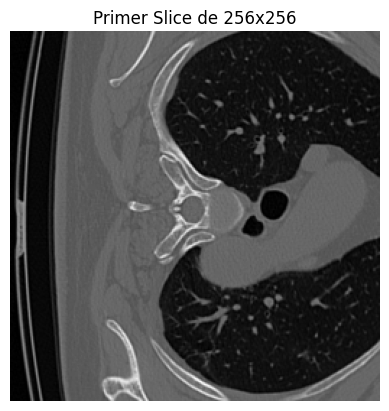

In [41]:
from matplotlib import pyplot as plt
# Aquí simplemente simularé un array de prueba ya que no tengo acceso a los datos reales

# Visualizar el primer slice
plt.imshow(output_array[200], cmap='gray')
plt.title('Primer Slice de 256x256')
plt.axis('off')  # Ocultar los ejes para enfocarse en la imagen
plt.show()